# Introduction to Python for Machine Learning (v 3.0)

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

## 2. Import Dataset

#### 2.1. Create Directories and URL

In [3]:
# Create url
url = 'http://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'

# variable to store file path
file_path = r'DataSets'

# variable to store file name
file_name = 'fuel_dataset.xlsx'

# variable to store file directory
file_directory = file_path+"\\"+file_name

# string variable to store sheet name
excel_sheet = 'DataSet'

# Create file directory
os.makedirs(os.path.dirname(file_directory), exist_ok=True)

#### 2.2. Import DataSet to Local directory

In [4]:
try: # try load from file
    raw_df = pd.read_excel(file_directory, excel_sheet)
    print("Fuel DataSet Loaded!")
except FileNotFoundError: 
    try: # try download data set from git repo
        raw_df = pd.read_csv(url)
        # Save to local storage
        raw_df.to_excel(file_directory, excel_sheet, index=False) 
        print("File downloaded!") 
    except OSError: 
        print('Network Connection Error!')

Fuel DataSet Loaded!


## 3. Data Exploration 
###### -> Here we would try to understand our dataset

#### 3.1. Display the data set

In [5]:
# Display first 4 rows
raw_df.head(4)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970


#### 3.2. Display dataset info

In [6]:
# Get data set info
raw_df.info(verbose=True, null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   record_id                     object 
 1   utility_id_ferc1              int64  
 2   report_year                   int64  
 3   plant_name_ferc1              object 
 4   fuel_type_code_pudl           object 
 5   fuel_unit                     object 
 6   fuel_qty_burned               int64  
 7   fuel_mmbtu_per_unit           float64
 8   fuel_cost_per_unit_burned     float64
 9   fuel_cost_per_unit_delivered  float64
 10  fuel_cost_per_mmbtu           float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


#### 3.3. Describe the data set to understand the relations, dependencies, frequencies and unique features

In [7]:
# describe dataset
raw_df.describe(include = 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2004_12_195_1_9,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


#### 3.4. Check Are there null values (how many)?

In [8]:
# Check for null values in dataset
raw_df.isna().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

#### 3.5. What correlations do this data set have?
###### -> This would enable us to understand how closely related some features are.

In [9]:
# Check data correlation
raw_df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [10]:
"""-> The most correlation was between the 'report_year' and the 'utility_id_ferc1', while the least correlation was between the 'fuel_mmbtu_per_unit' and the 'report_year'.
There is a huge disjoint here, why?"""

"-> The most correlation was between the 'report_year' and the 'utility_id_ferc1', while the least correlation was between the 'fuel_mmbtu_per_unit' and the 'report_year'.\nThere is a huge disjoint here, why?"

#### 3.6. What are the least and most correlated features in the data set?

In [11]:
# Check if there is any correlation between axis='fuel_cost_per_unit_delivered' 
# and axis='fuel_cost_per_unit_burned'
raw_df.corrwith(raw_df['fuel_cost_per_unit_delivered'])

utility_id_ferc1               -0.016414
report_year                    -0.014043
fuel_qty_burned                -0.003551
fuel_mmbtu_per_unit            -0.009039
fuel_cost_per_unit_burned       0.011007
fuel_cost_per_unit_delivered    1.000000
fuel_cost_per_mmbtu            -0.000109
dtype: float64

#### 3.7. Probability distribution density of the dataset (i.e using kurtosis() and skewness())

In [12]:
""" -> This would help in determining presence of outliers and column involved """

' -> This would help in determining presence of outliers and column involved '

In [13]:
# Check for the peak and tails of the dataset using pd.DataFrame().kurtosis()
# to determine the outliers in the dataset
raw_df.kurtosis()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

In [14]:
# Check for the peak and tails of the dataset using pd.DataFrame().sew()
# to determine the outliers in the dataset
raw_df.skew()

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

## 4. Data Cleaning and Data Wrangling

###### -> This is section is divided into Tasks:

#### 4.1. Task 1: Clean columns = 'plant_name_ferc1'

In [15]:
# display rows column = 'plant_name_ferc1' before cleaning
raw_df['plant_name_ferc1'].head(5) 

0                rockport
1    rockport total plant
2                  gorgas
3                   barry
4               chickasaw
Name: plant_name_ferc1, dtype: object

In [16]:
# function to remove characters such as #,*,(,),&,. from the strings & cluster them together which
# would improve uniqueness of the plant names
def clean_string(string):  
    return string.translate({ord(c): '' for c in '.#*$&()'}) 

In [17]:
# apply function to columns='plant_name_ferc1' to remove characters
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].apply(lambda x: clean_string(x))

In [18]:
# check the first 10 words 
raw_df['plant_name_ferc1'].head(30)

0                 rockport
1     rockport total plant
2                   gorgas
3                    barry
4                chickasaw
5        e c gaston-unit 5
6          joseph m farley
7      resondent's portion
8     respondent's portion
9                units 1-3
10               units 1-3
11                  unit 4
12                  unit 4
13            clinch river
14            clinch river
15         amos-apco share
16              amos-total
17                glen lyn
18           kanawha river
19           kanawha river
20               mountainr
21               mountainr
22       philip sporn-apco
23       philip sporn-apco
24    philip sporn ttl plt
25    philip sporn ttl plt
26      cholla units 1,2,3
27      cholla units 1,2,3
28      cholla units 1,2,3
29               4 corners
Name: plant_name_ferc1, dtype: object

In [19]:
# check for key words like 'plant','total','power'
raw_df.loc[raw_df['plant_name_ferc1'].str.contains('plant|total|power', regex=True)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.580,18.530,1.12000
16,f1_fuel_1994_12_6_0_7,6,1994,amos-total,coal,ton,5327281,24.538,44.312,42.940,1.80600
89,f1_fuel_1994_12_12_0_11,12,1994,osage plant,coal,ton,205675,16.010,14.720,14.300,0.91900
90,f1_fuel_1994_12_12_0_14,12,1994,wyodak plant,coal,ton,391234,15.896,10.100,9.670,0.63500
173,f1_fuel_1994_12_44_0_2,44,1994,belle river total,coal,ton,4996518,18.706,27.620,27.620,1.47600
...,...,...,...,...,...,...,...,...,...,...,...
29475,f1_fuel_2018_12_193_1_1,193,2018,presque isle-total,coal,ton,1029238,18.024,42.557,42.557,2.36112
29476,f1_fuel_2018_12_193_1_5,193,2018,pt washington-total,gas,mcf,39905100,1.010,3.211,3.211,3.18960
29479,f1_fuel_2018_12_193_1_10,193,2018,so oak creek-total,coal,ton,2784916,17.568,36.526,36.526,2.07912
29480,f1_fuel_2018_12_193_1_12,193,2018,so oak creek-total,gas,mcf,358934,1.010,3.475,3.475,3.43815


In [20]:
# remove words such as 'plant','power','total' to improve uniqueness|similarity of plant names
def remove_substrings():
    x_strings = ['plant','power','total','ttl','plt']
    return lambda x: ' '.join([word for word in x.split() if word not in x_strings])

# apply to column = 'plant_name_ferc1'
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].apply(remove_substrings())

In [21]:
# display first 5 rows in the column = 'plant_name_ferc1' after cleaning
raw_df['plant_name_ferc1'].head(50) 

0                 rockport
1                 rockport
2                   gorgas
3                    barry
4                chickasaw
5        e c gaston-unit 5
6          joseph m farley
7      resondent's portion
8     respondent's portion
9                units 1-3
10               units 1-3
11                  unit 4
12                  unit 4
13            clinch river
14            clinch river
15         amos-apco share
16              amos-total
17                glen lyn
18           kanawha river
19           kanawha river
20               mountainr
21               mountainr
22       philip sporn-apco
23       philip sporn-apco
24            philip sporn
25            philip sporn
26      cholla units 1,2,3
27      cholla units 1,2,3
28      cholla units 1,2,3
29               4 corners
30               4 corners
31               4 corners
32               4 corners
33             ocotillo 12
34        saguaro units 12
35        saguaro units 12
36                 yucca 1
3

#### 4.2. Task 2: Remove null values in column = 'fuel_unit'

In [22]:
#display first 5 rows of dataframe
raw_df.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [23]:
# display null values contained in the data set
raw_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [24]:
# check the number of occurence of each fuel unit grouped by fuel types
raw_df.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts()

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

###### -> Select the most frequent fuel unit in each group

In [25]:
# create variables of list and dataframe types
fuel_unit_list = []
fuel_type_df   = pd.DataFrame()

# store the unique fuel types as a list
fuel_type_list = raw_df['fuel_type_code_pudl'].unique()

# loop through the fuel types and append to selected fuel units in each group  
# Please note: these fuel units where selected by their frequency|count of appearance. the 
# most occurring are the selected units to be taken.
for fuel_type in fuel_type_list:
    fuel_unit_list.append(raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type,'fuel_unit'].mode())

# fill the dataframe 'fuel_type_df' with the fuel_type_list and fuel_unit_list   
fuel_type_df['Fuel Types'] = fuel_type_list
fuel_type_df['Fuel Units'] = pd.DataFrame(fuel_unit_list)
fuel_type_df

,Fuel Types,Fuel Units
0,coal,ton
1,gas,mcf
2,nuclear,gramsU
3,oil,bbl
4,waste,ton
5,other,ton


In [26]:
# remove null values from axis='fuel_unit' by grouping axis='fuel_type_code_pudl'
for index,fuel_type in fuel_type_df.iterrows():
    raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type['Fuel Types'],'fuel_unit'] = raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type['Fuel Types'],'fuel_unit'].fillna(value=fuel_type['Fuel Units'])

raw_df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

#### 4.3. Task 3: Fill the rows containing '0' in axis='fuel_cost_per_unit_delivered'

In [27]:
# Mask all the values in column = 'fuel_per_unit_cost_delivered' containing zero 
# value with the relative value on column = 'fuel_per_unit_cost_burned'
df1 = raw_df['fuel_cost_per_unit_delivered']
df2 = raw_df['fuel_cost_per_unit_burned']

raw_df['fuel_cost_per_unit_delivered'] = df1.mask(df1==0, df2)

In [28]:
raw_df['fuel_cost_per_unit_delivered'].head(50)

0       18.530
1       18.530
2       38.120
3       45.990
4        2.770
5       43.250
6       28.770
7       55.130
8       34.650
9       28.110
10       1.940
11      28.110
12       1.940
13      29.019
14      23.444
15      42.915
16      42.940
17      32.893
18      42.034
19      26.280
20      38.717
21      23.884
22      35.856
23      30.508
24      35.793
25      30.507
26      31.200
27      28.730
28       2.480
29      20.860
30       2.690
31      21.050
32       2.980
33       2.170
34      32.060
35       2.200
36      39.140
37       2.380
38      23.640
39       2.290
40      28.080
41       2.530
42       2.210
43      52.150
44       1.920
45    1550.000
46      22.520
47       2.290
48      43.550
49      34.180
Name: fuel_cost_per_unit_delivered, dtype: float64

#### 4.4. Task 4: Convert all zero values on column = 9 and 10 to null values. 

In [29]:
# Mask all the values in column = 'fuel_per_unit_cost_delivered' containing zero 
# value with the relative value on column = 'fuel_per_unit_cost_burned'
df1 = raw_df['fuel_cost_per_unit_burned'] 
df2 = raw_df['fuel_cost_per_unit_delivered']

raw_df['fuel_cost_per_unit_burned']    = df1.mask(df1==0, np.nan)
raw_df['fuel_cost_per_unit_delivered'] = df2.mask(df2==0, np.nan)

# display the null values of of the two columns
raw_df.iloc[:,8:10].isna().sum()

fuel_cost_per_unit_burned       288
fuel_cost_per_unit_delivered    224
dtype: int64

#### 4.5. Task 5: Drop all rows containing null values and reset the index of the dataframe

In [30]:
# display the null values of of the two columns
raw_df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                         0
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned       288
fuel_cost_per_unit_delivered    224
fuel_cost_per_mmbtu               0
dtype: int64

In [31]:
# drop null values and reset index
raw_df.dropna(inplace=True)

In [32]:
# display the null values of of the two columns
raw_df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [33]:
raw_df.reset_index(drop=False,inplace=True)

#### 4.6. Task 6: Check and remove outliers from the dataset if any

In [35]:
# remove outliers
Q1 = raw_df.quantile(0.05)
Q3 = raw_df.quantile(0.95)

IQR = Q3 - Q1
raw_df  = raw_df[~((raw_df<=(Q1-1.5*IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)]
raw_df.describe()

,index,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,28388.000000,28388.000000,28388.000000,2.838800e+04,28388.000000,28388.000000,28388.000000,28388.000000
mean,14776.600007,119.291849,2005.818726,1.814315e+06,8.271817,35.182214,35.158958,6.202532
std,8497.448992,74.037463,7.005107,4.380509e+06,8.684610,37.157214,37.876230,5.886668
min,0.000000,1.000000,1994.000000,1.000000e+00,0.000006,-123.310000,-174.670000,-5.750000
25%,7457.750000,55.000000,2000.000000,1.371550e+04,1.024000,5.461000,5.300000,1.982000
50%,14767.500000,127.000000,2006.000000,2.387295e+05,5.770842,26.651500,25.567000,4.173000
75%,22119.250000,177.000000,2012.000000,1.359473e+06,17.074000,47.124000,47.050250,7.783250
max,29521.000000,513.000000,2018.000000,3.302884e+07,60.035126,295.310000,295.310000,48.555000


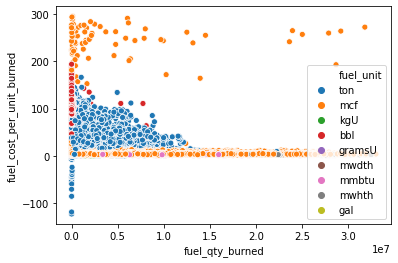

In [36]:
def plot_scatter(x,y,h,df):
    sns.scatterplot(x=x,y=y,hue=h,data=df) 
    plt.show()

# show data distribution
plot_scatter('fuel_qty_burned','fuel_cost_per_unit_burned','fuel_unit',raw_df)

In [43]:
# Save modified dataframe to file
raw_df.to_excel(file_path+"\\"+'Modified_1.xlsx','Modified sheet',index=False)

## 5. Data Visualization

In [44]:
new_df = pd.read_excel(file_path+"\\"+'Modified_1.xlsx','Modified sheet')

#### 5.1. What fuel was the most effecient 

In [45]:
new_df['energy_generated_mmbtu'] = new_df['fuel_qty_burned'] * new_df['fuel_mmbtu_per_unit']

# display
new_df.head()

,index,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,energy_generated_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121,8.921254e+07
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592,18.58,18.53,1.120,1.739994e+08
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650,7.187562e+07
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970,8.956064e+07
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570,4.053300e+04


In [46]:
new_df['energy_cost'] = new_df['fuel_mmbtu_per_unit'] * new_df['fuel_cost_per_mmbtu']
new_df['heat_rate_mmbtu_per_kWH'] = new_df['fuel_mmbtu_per_unit'] / 0.003412
def plant_efficiency(address):
    return 314200/address
new_df['plant_efficiency'] =  new_df['heat_rate_mmbtu_per_kWH'].apply(lambda x: plant_efficiency(x))
new_df['plant_efficiency'].head(30)

0        64.620277
1        64.612488
2        44.428114
3        44.762021
4      1072.050400
5        44.814414
6     16726.220863
7        43.158229
8        44.135463
9        47.680591
10     1044.883431
11       47.799643
12     1044.883431
13       42.816934
14      182.466166
15       43.742876
16       43.689396
17       41.494442
18       42.609316
19      185.637783
20       43.710772
21      183.393036
22       44.055659
23      186.675025
24       44.055659
25      186.676390
26       53.683045
27      183.224532
28     1216.993056
29       61.155185
Name: plant_efficiency, dtype: float64

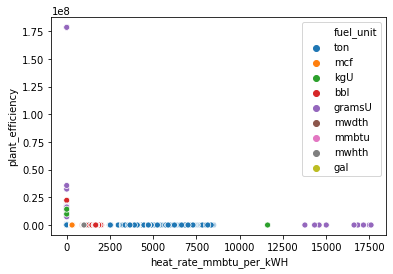

In [47]:
# show data distribution
plot_scatter('heat_rate_mmbtu_per_kWH','plant_efficiency','fuel_unit',new_df)

In [48]:
def remove_outliers(df):
    data = df.values
    # Calculate interquartile range
    q25, q75 = np.percentile(data,25),np.percentile(data,75)
    iqr = q75-q25
    print(f'Percentiles: 25th={q25}%, 75th={q75}% IQR={iqr}%')
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print(f'Identified outliers: {len(outliers)}')
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print(f'Non-outliers observations: {outliers_removed}')
    return outliers_removed

             fuel_mmbtu_per_unit  heat_rate_mmbtu_per_kWH
report_year                                              
1994                   10.054202              2946.718118
1995                   10.031549              2940.078740
1996                   10.212512              2993.116094
1997                    9.854492              2888.186332
1998                    9.526185              2791.965014
1999                    9.827514              2880.279651
2000                    8.784984              2574.731456
2001                    8.188077              2399.788192
2002                    8.123389              2380.829063
2003                    8.245834              2416.715593
2004                    8.203400              2404.278996
2005                    7.961714              2333.445025
2006                    8.054172              2360.542910
2007                    8.004902              2346.102697
2008                    7.917806              2320.576280
2009          

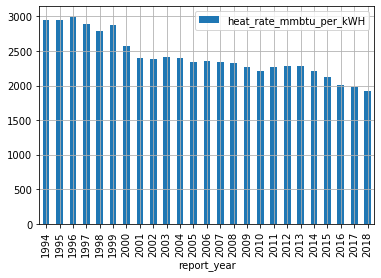

In [49]:
result = new_df.groupby(['report_year']).mean()

# print to display
print(result[['fuel_mmbtu_per_unit','heat_rate_mmbtu_per_kWH']])

result[['heat_rate_mmbtu_per_kWH']].plot.bar()
plt.grid()

             plant_efficiency  heat_rate_mmbtu_per_kWH
report_year                                           
1994            362265.775763              2946.718118
1995            349242.936983              2940.078740
1996            228605.161561              2993.116094
1997            225653.577907              2888.186332
1998            359162.833318              2791.965014
1999            359558.054614              2880.279651
2000            138737.698601              2574.731456
2001             97552.084281              2399.788192
2002             76306.418940              2380.829063
2003             73896.325698              2416.715593
2004             96420.972221              2404.278996
2005             56176.176261              2333.445025
2006             53513.406720              2360.542910
2007             30432.274932              2346.102697
2008             17217.989224              2320.576280
2009             89355.991260              2268.924161
2010      

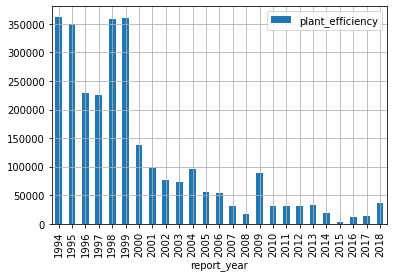

In [50]:
result = new_df.groupby(['report_year']).mean()

# print to display
print(result[['plant_efficiency','heat_rate_mmbtu_per_kWH']])

result[['plant_efficiency']].plot.bar()
plt.grid()

             fuel_mmbtu_per_unit
report_year                     
1994                   10.054202
1995                   10.031549
1996                   10.212512
1997                    9.854492
1998                    9.526185
1999                    9.827514
2000                    8.784984
2001                    8.188077
2002                    8.123389
2003                    8.245834
2004                    8.203400
2005                    7.961714
2006                    8.054172
2007                    8.004902
2008                    7.917806
2009                    7.741569
2010                    7.535308
2011                    7.735788
2012                    7.810835
2013                    7.786777
2014                    7.535207
2015                    7.238730
2016                    6.854506
2017                    6.761785
2018                    6.573421


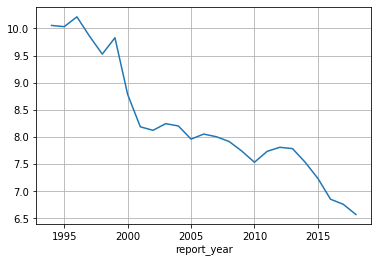

In [51]:
result = new_df.groupby(['report_year']).mean()

# print to display
print(result[['fuel_mmbtu_per_unit']])

result['fuel_mmbtu_per_unit'].plot()
plt.grid()

##### What utitility had the consummed the hightest fuel

#### Which plant is the most efficient?

#### Which utilities are the best and worst performing

                  fuel_mmbtu_per_unit   energy_cost
utility_id_ferc1                                   
1                         1094.307010   4597.809648
2                         1826.234705   5109.741052
4                          280.946000    372.428081
6                         5236.669780  20701.917843
7                         3678.055904  15286.947497
...                               ...           ...
432                        230.908793   2848.651095
449                         57.632498    227.770855
452                        442.589144   2690.711229
454                        288.992928   1856.244366
513                          2.064000     11.804016

[182 rows x 2 columns]


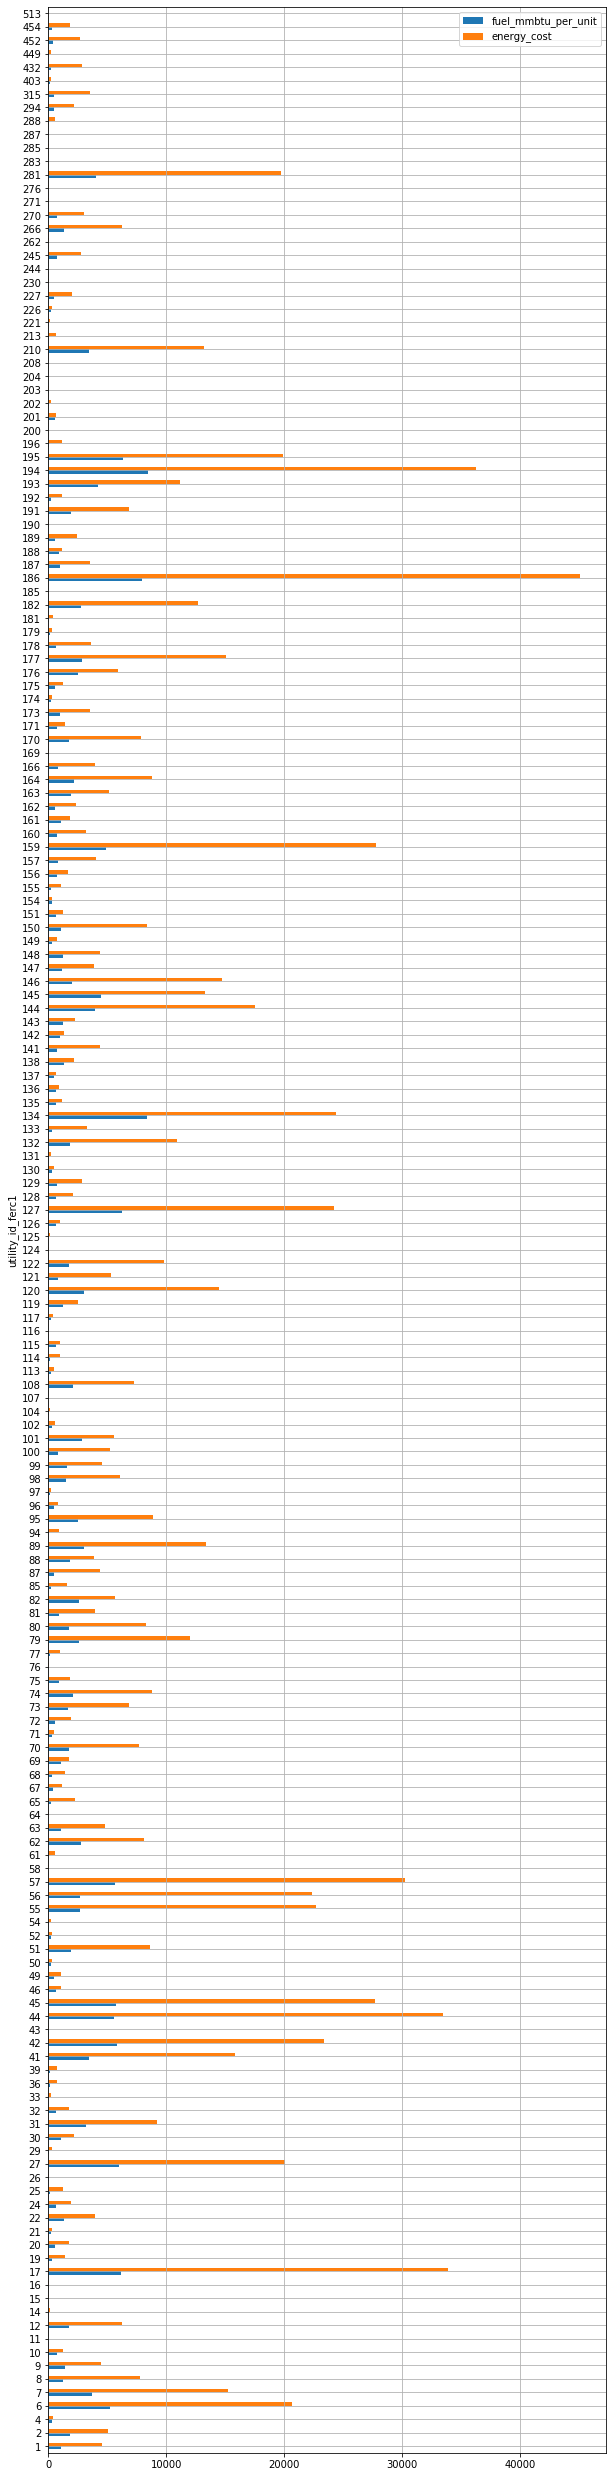

In [52]:
result = new_df.groupby('utility_id_ferc1').sum()

print(result[['fuel_mmbtu_per_unit','energy_cost']])

result[['fuel_mmbtu_per_unit','energy_cost']].plot.barh(figsize=(10,45))
#result[].plot.barh(color='red')
plt.grid()
plt.show()

#### Which of the fuels are the most economical and efficient

                     fuel_mmbtu_per_unit  energy_cost
fuel_type_code_pudl                                  
coal                           20.767372    37.805526
gas                             1.021897     5.537370
nuclear                         2.197608     1.227672
oil                             5.815627    73.422352
other                           0.084818     0.280045
waste                           0.358703     0.799033


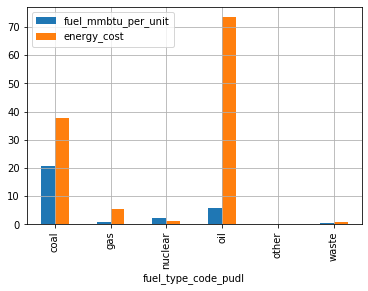

In [53]:
result = new_df.groupby('fuel_type_code_pudl').mean()

# print to display
print(result[['fuel_mmbtu_per_unit','energy_cost']])

# plot graph
result[['fuel_mmbtu_per_unit','energy_cost']].plot.bar()
plt.grid()

#### What year was the best performing year independent of the cost of fuel per mmbtu?

#### What factors where responsible for the outstanding performance in question --- above?

#### Seeing the above what are your recommendations?